In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Boer, Daan (0870734)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

training session) by adding a new first hidden layer twice the size of the current first hidden layer, until the desired accuracy was reached. The hidden layers use relu for relatively fast learning. I used a batch size of 64 and the adagrad optimizer as it provides more stable curves. The accuracy is decent but can increase with more epochs (minor overfitting). (length: 365)



Max val score: 71.74%


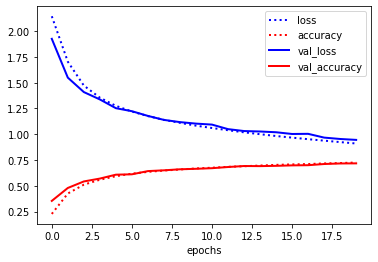

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_20 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_99 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_100 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_101 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_102 (Dense)            (None, 64)                8256      
_________________________________________________________________


dense_103 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_104 (Dense)            (None, 10)                330       
Total params: 3,846,442
Trainable params: 3,846,442
Non-trainable params: 0
_________________________________________________________________
None


def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
  pass



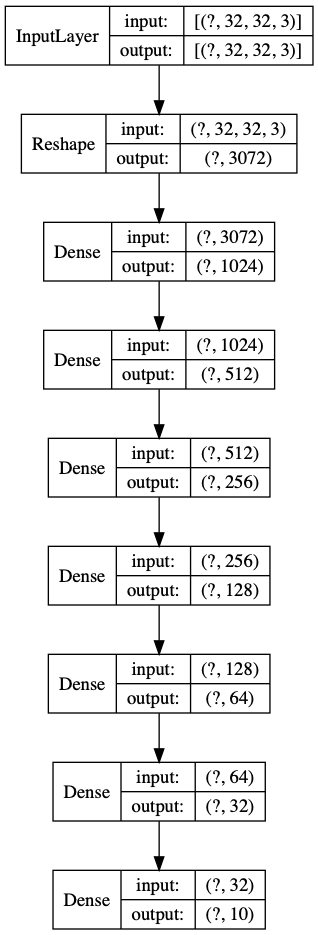

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

indicates that the color of the digits and the background does not benefit the classification of digits. Furthermore, due to the smaller input size, the model is easier and faster to train. (length: 190)



Max val score: 72.36%


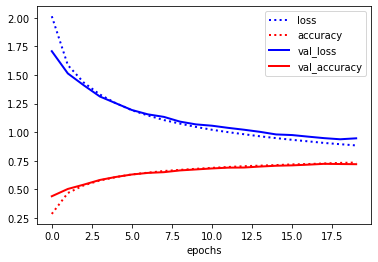

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_55 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_363 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_364 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_365 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_366 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_367 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_368 (Dense)            (None, 32)              

def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
  pass



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

 Dropout (.1) after all dense, hidden layers: 20 epochs: ~71% 50 epochs: ~77% val_acc > acc Dropout (.1) after last 4 dense, hidden layers: 20 epochs: ~73% 50 epochs: ~78% val_acc > acc Dropout (.1) after last 2 dense, hidden layers: 20 epochs: ~73% 50 epochs: ~79% val_acc ~= acc  The last option is best, as it is most performant while still removing all overfitting (it might still improve with more epochs). (length: 412)



Max val score: 79.09%


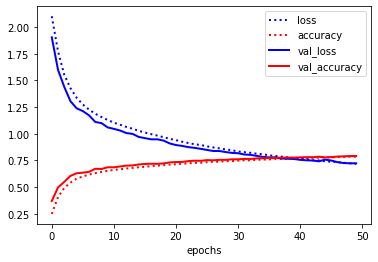

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(.1))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(.1))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
  pass



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

The following steps have been taken to reach this goal: 1. Adding batch normalization. 2. Tuning the dropout (start with a low constant dropout throughout and eventually scale up the dropout in the 'deeper' layers). 3. Changing to the Adam optimizer as it provided more promising results, I also tried adagrad but learning was slow (as expected). 4. Change the batch size to 64 to increase training speed. 5. Increase the number of epochs to ensure a plateau is reached.  The model is working well, it reaches a validation accuracy of ~.94-.955. However, it does not seem to be able to surpass this threshold. It is also still slightly overfitting. (length: 649)



Max val score: 95.46%


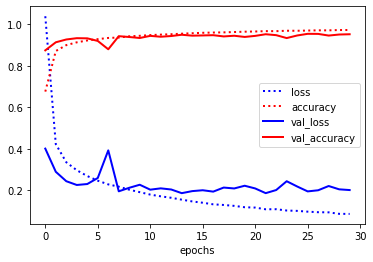

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_98 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_99 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 16, 16, 64)      

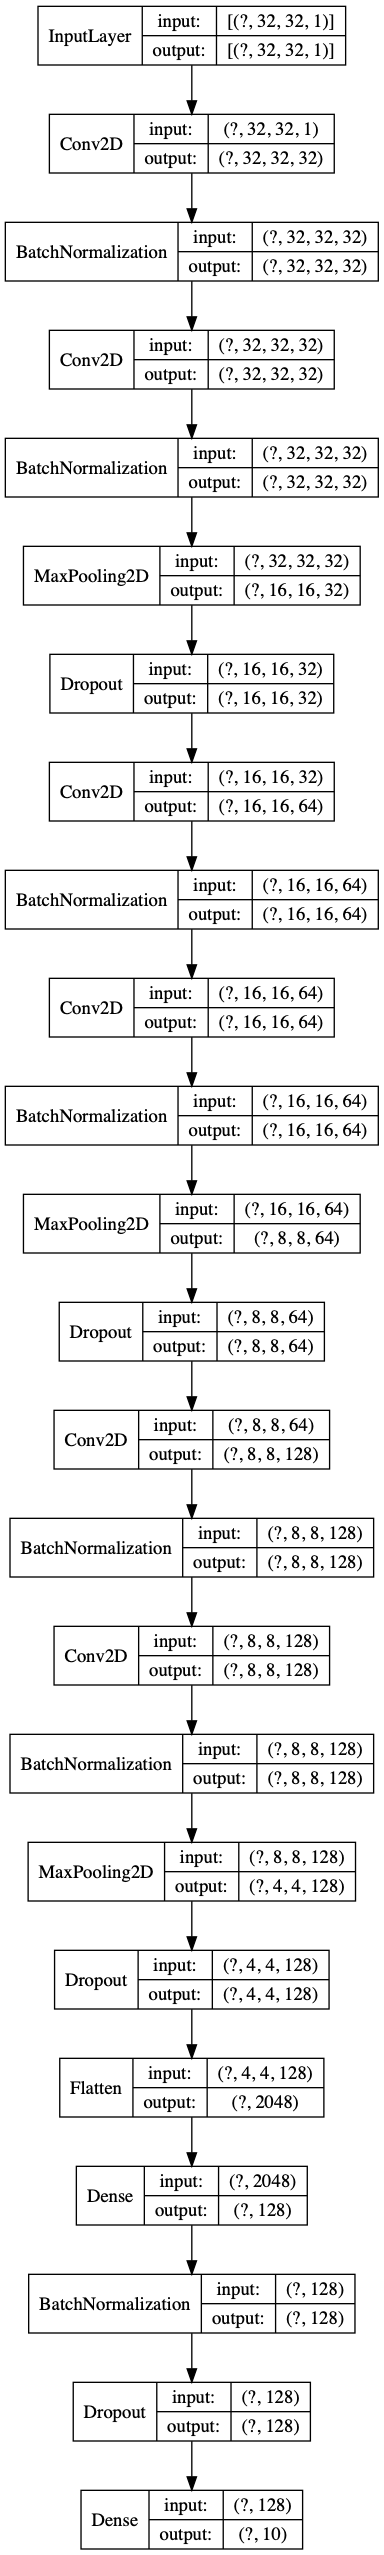

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Performance: 1. Small width/height shift (.1): improved max val_acc by ~.4-.5%. The model does not overfit. - A .2 shift reduces accuracy. 2. Adding horizontal flip reduces accuracy. 3. Adding zoom (.2): improved max val_acc by ~.51-.61%. - A .1 zoom is worse. 4. Adding rotation (.1) reduces accuracy. 5. Adding shear (.1) improves accuracy by ~.4%.  Based on the gathered results I propose a .1 width/height shift and a .2 zoom range. Other options or higher values often performed less. (length: 490)



Max val score: 96.07%


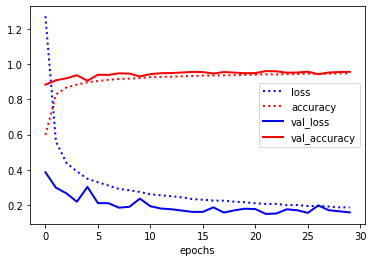


generator = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, zoom_range=.2)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

Classes 7, 9, and 6 are misclassified most often. The model seems to misclassify blurry, heavily rotated or tilted pictures, pictures where another number is clearly visible, and pictures where part of the background seems to be part of the number. (length: 249)

Test score: <tensorflow.python.keras.callbacks.History object at 0x1355ddc88>
[(7, 0.9205515430072226), (9, 0.9368505195843325), (6, 0.9383517196625568)]


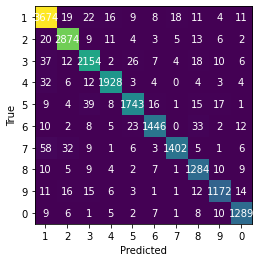

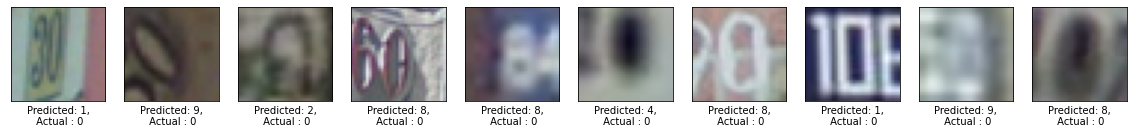

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

Layers: 1: Clear edge detection, general, vertical, and horizontal. 2: Original shape is present in most images. Detection is a bit more specialized: curvature, ellipses, and straight (diagonal) lines. 3: More specific. Some images show a clear distinction between the 8 and the background, vertical black line and the 5. 4: Simplification of 3. Clear distinction of separate features (e.g. upper circle in image 2). 5/6: Abstract. Outline of 8, or specific features are visible in some images. (length: 495)



64


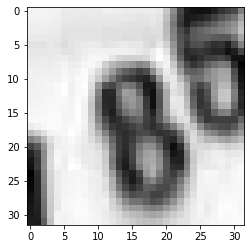

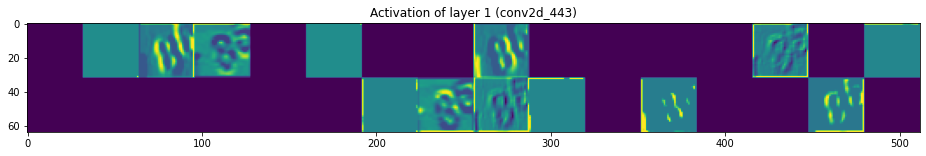

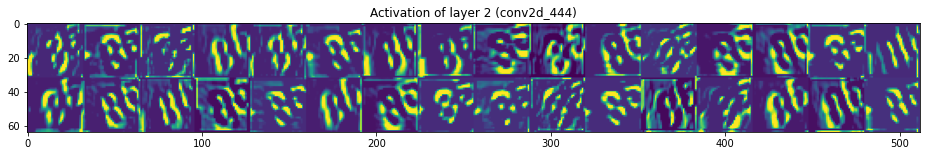

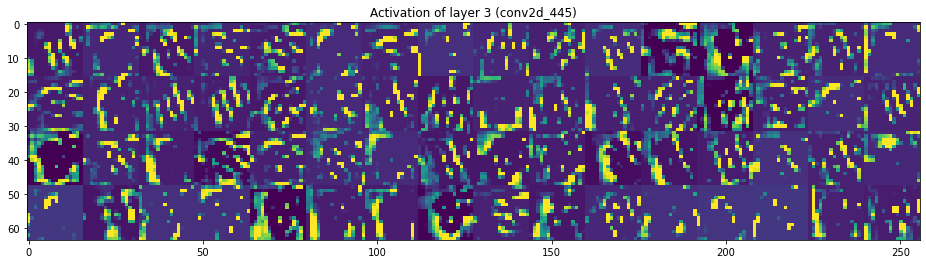

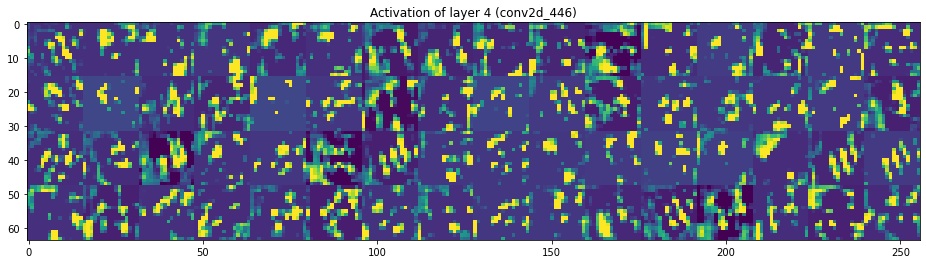

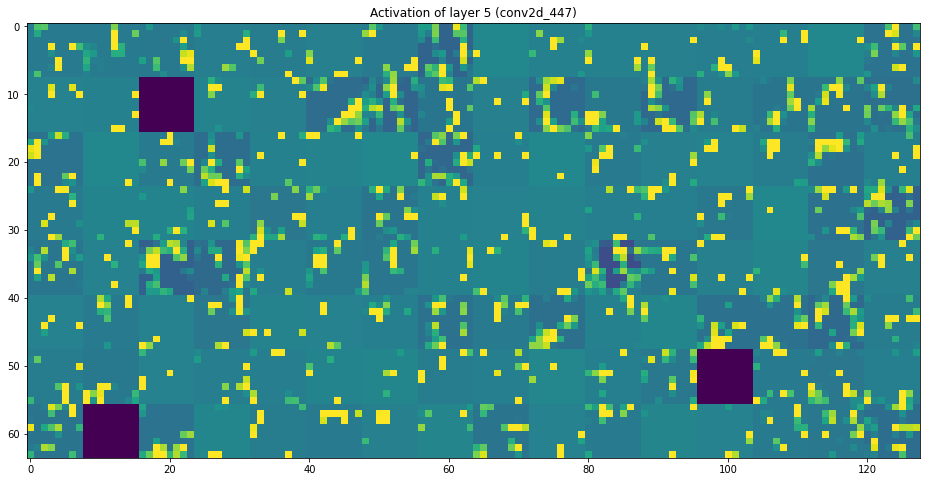

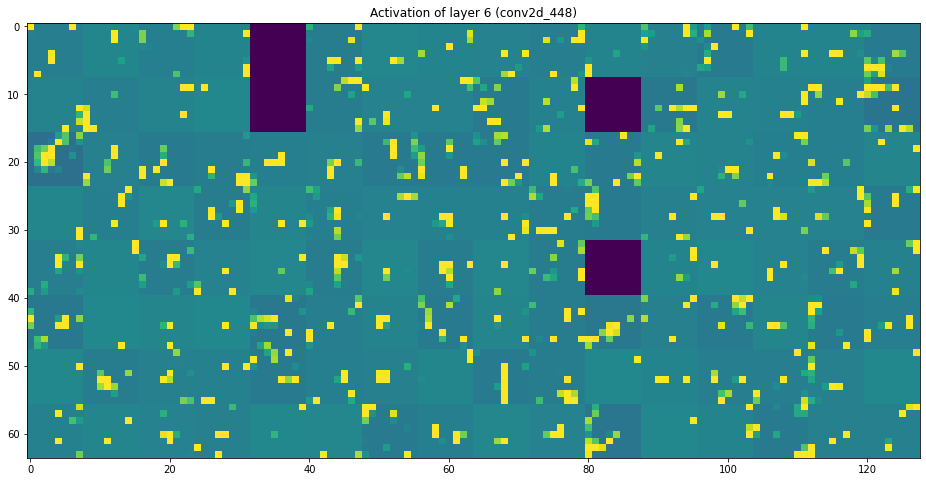

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

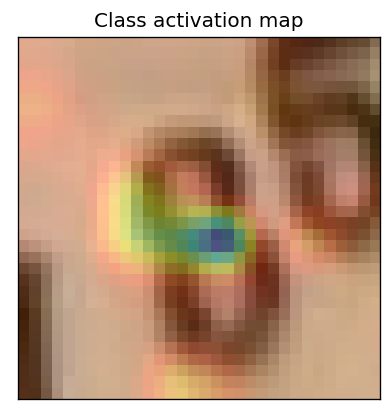

def plot_3_3():
  model = load_model_from_file(base_dir=base_dir, name='model_2_2')
  sample = np.expand_dims(X_test_prep[0, :, :, :], axis = 0)

  layer_outputs = [layer.output for layer in model.layers[:] if isinstance(layer, tf.keras.layers.Conv2D)]
  activation_model = models.Model(inputs=model.input, outputs=[layer_outputs[-1], model.output])

  # K.gradients did not work so I had to resort to a different method.
  with tf.GradientTape() as tape:
    conv_output, pred = activation_model(sample)
    loss = pred[:, np.argmax(pred[0])]
    grads = tape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # plt.matshow(heatmap[0, :, :])
  # plt.show()

  sample_2d = sample[0, :, :, 0]
  heatmap = cv2.resize(heatmap[0, :, :], sample_2d.shape)
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, 

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

When freezing the convolutional base, the accuracy is stagnant at ~55%. The trainable part of the model might be a bit too simple. When unfreezing the last 2 layers, the max val_acc is ~67%. Slight overfitting after the third epoch. When unfreezing the last 4 layers, the max val_acc is ~78%. The model is overfitting after the third epoch. (length: 341)



Max val score: 79.76%


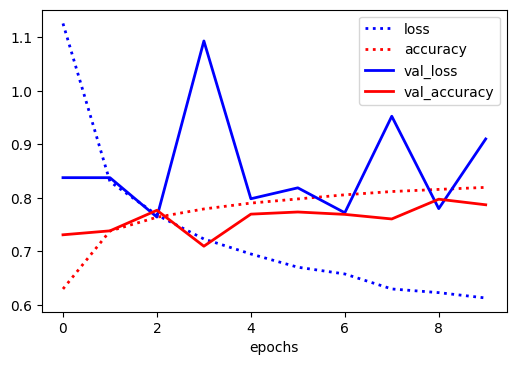

Model: "model_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0 

def build_model_4_1():
  # freeze the convolutional base
  for layer in conv_base.layers[:15]:
    layer.trainable = False
  
  # add a dense layer to the output (question specifically states a single layer)
  x = conv_base.output
  x = layers.Flatten()(x)
  # x = layers.Dense(256, activation='relu')(x)
  dense_model = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=conv_base.input, outputs=dense_model)

  model.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  return model



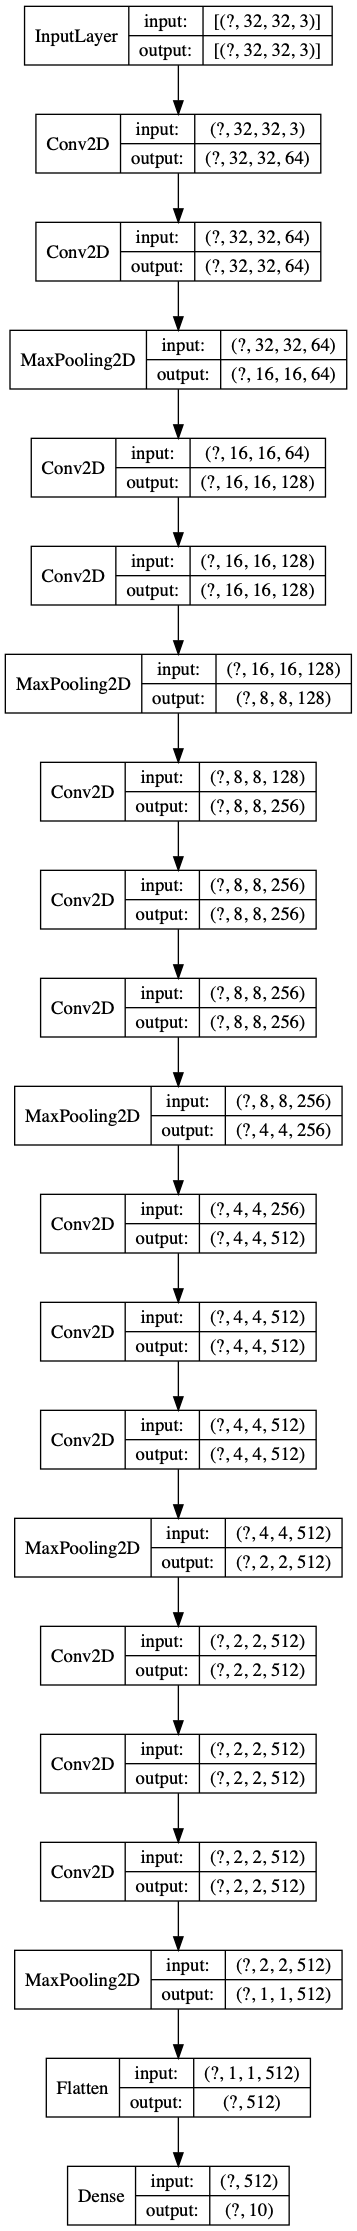

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

- No imputer is needed since there is no missing data. - The input data is not categorical so an encoder is not needed. - A StandardScaler is added (although it does not really affect RF). The label data is preprocessed to a 1D array containing the label-ids for each sample.  A grid search for RF resulted in "optimal" values of, n_estimators=1150 and max_features=.0875.  SVM: ~.7368 SVM + Scaler: ~.8106 Optimized RF: ~.8105  Model 2.2 is still the best with ~.96 (length: 467)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', SVC())])
def store_embeddings():
  """ Stores all necessary embeddings to file
  """

  model_4_1 = load_model_from_file(base_dir, "model_4_1")
  # conv_output = [layer.output for layer in model_4_1.layers[:-3]];
  conv_model = models.Model(inputs=model_4_1.input, outputs=model_4_1.layers[-2].output)

  train_embeddings = conv_model.predict(X_train)
  store_embedding(train_embeddings, "X_train")

  test_

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 14.34 seconds


Last modified: May 26, 2020
scikit-learn version: 0.23.1
